In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('trip.csv')

In [3]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


# 1. 결측치 제거

In [6]:
data[data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [7]:
data['fare_amount'].median()

np.float64(9.5)

In [8]:
data['fare_amount'].mean()

np.float64(13.02400916380298)

In [9]:
data['fare_amount'].mode()

0    6.0
Name: fare_amount, dtype: float64

In [10]:
data['fare_amount'].isna().mean()

np.float64(0.0001321527686005022)

In [11]:
#fare_amount는 중간값, 평균 등으로 대체하기에는 distance 등이 달라 적은 비율이라 제거
data = data.dropna(subset = ['fare_amount'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22698 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22698 non-null  object 
 1   tpep_pickup_datetime   22698 non-null  object 
 2   tpep_dropoff_datetime  22698 non-null  object 
 3   payment_method         22698 non-null  object 
 4   passenger_count        22698 non-null  int64  
 5   trip_distance          22698 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22698 non-null  float64
 8   tolls_amount           22698 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


# 2. 이상치 탐지 및 처리 (Outliers)

## 1) fare_amount 0 이하값 & 999

In [13]:
data['fare_amount'].sort_values()

12946   -120.00
20700     -4.50
11206     -4.50
17604     -4.00
14716     -4.00
          ...  
12513    175.00
15476    200.00
13863    200.01
20314    450.00
8478     999.99
Name: fare_amount, Length: 22698, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='None', ylabel='fare_amount'>

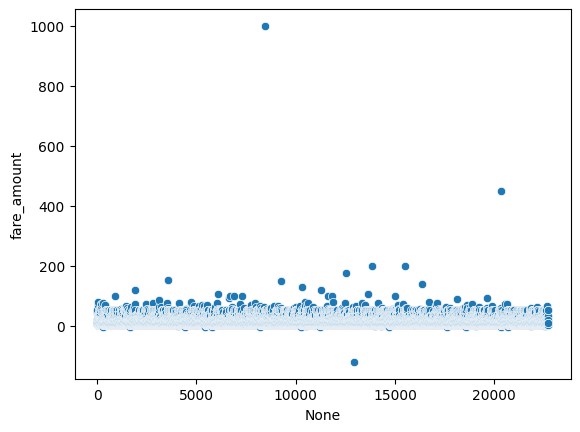

In [15]:
# fare_amount 값 중에서 높은 것도 있어보임 
sns.scatterplot(x = data.index, y = data['fare_amount'])

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

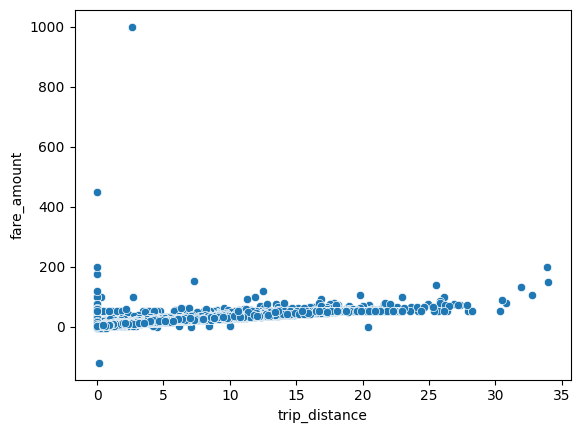

In [16]:
sns.scatterplot(x = data['trip_distance'], y = data['fare_amount'])

In [17]:
data.loc[20314] # distance도 0이고, 타고 내린 시간도 짧아서 잘못된 데이터로 보임.

passenger_name                 Nicholas Thomas
tpep_pickup_datetime     12/19/2017 9:40:46 AM
tpep_dropoff_datetime    12/19/2017 9:40:55 AM
payment_method                            Cash
passenger_count                              2
trip_distance                              0.0
fare_amount                              450.0
tip_amount                                 0.0
tolls_amount                               0.0
Name: 20314, dtype: object

In [18]:
data.loc[13863] # 이건 distance도 있고 타고 내린 시간이 있어 정상으로 보임. 근데 trip distance가 0인데 fare_amount값이 있는 것들이 몇개 보임

passenger_name                   William Yates
tpep_pickup_datetime     05/19/2017 8:20:21 AM
tpep_dropoff_datetime    05/19/2017 9:20:30 AM
payment_method                     Credit Card
passenger_count                              1
trip_distance                            33.92
fare_amount                             200.01
tip_amount                               51.64
tolls_amount                              5.76
Name: 13863, dtype: object

In [19]:
data.groupby('trip_distance')['fare_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
trip_distance,,,,,,,,
0.00,148.0,23.130743,47.338249,-2.50,2.50,3.00,30.000,450.00
0.01,7.0,30.785714,26.458863,2.50,2.50,52.00,52.000,52.00
0.02,11.0,7.272727,15.128390,-2.50,2.50,2.50,2.500,52.00
0.03,4.0,7.125000,8.919781,2.50,2.50,2.75,7.375,20.50
0.04,4.0,1.750000,2.986079,-2.50,1.25,2.50,3.000,4.50
...,...,...,...,...,...,...,...,...
30.83,1.0,80.000000,NaN,80.00,80.00,80.00,80.000,80.00
31.95,1.0,131.000000,NaN,131.00,131.00,131.00,131.000,131.00
32.72,1.0,107.000000,NaN,107.00,107.00,107.00,107.000,107.00


In [20]:
data[data['trip_distance'] == 0]['fare_amount'].describe()

count    148.000000
mean      23.130743
std       47.338249
min       -2.500000
25%        2.500000
50%        3.000000
75%       30.000000
max      450.000000
Name: fare_amount, dtype: float64

In [21]:
data[data['trip_distance'] == 0]['fare_amount'].sort_values()

10283     -2.50
5724       0.00
10508      0.00
22568      0.00
14285      0.01
          ...  
7283     100.00
11271    120.00
12513    175.00
15476    200.00
20314    450.00
Name: fare_amount, Length: 148, dtype: float64

In [22]:
data.loc[14285]

passenger_name                       Mark Reed
tpep_pickup_datetime     05/03/2017 7:44:28 PM
tpep_dropoff_datetime    05/03/2017 7:44:38 PM
payment_method                      Debit Card
passenger_count                              1
trip_distance                              0.0
fare_amount                               0.01
tip_amount                                 0.0
tolls_amount                               0.0
Name: 14285, dtype: object

In [23]:
data[(data['fare_amount'] <= 0) | (data['fare_amount'] >= 450)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.50,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.50,0.0,0.0
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.00,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.00,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.50,0.0,0.0
5724,William Holland,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Debit Card,1,0.00,0.00,0.0,0.0
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.50,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.50,0.0,0.0
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.60,999.99,200.0,0.0
10283,Donna Larson,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Credit Card,2,0.00,-2.50,0.0,0.0


In [24]:
data = data[~((data['fare_amount'] <= 0) | (data['fare_amount'] >= 450))]

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

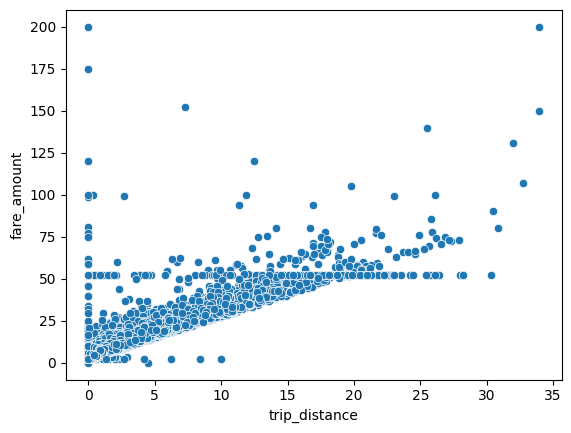

In [25]:
sns.scatterplot(x = data['trip_distance'], y = data['fare_amount'])

## 2) trip distance도 0보다 큰 것만 남기기(0인데 요금 부과는 outlier로 여겨짐)

In [26]:
data[data['trip_distance'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22045,Kelly Perez MD,07/06/2017 10:27:11 AM,07/06/2017 10:40:07 AM,Cash,1,0.0,52.0,0.00,0.0
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0


In [27]:
data = data[data['trip_distance'] > 0]

In [28]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22533.000000,22533.000000,22533.000000,22533.000000,22533.000000
mean,1.645098,2.932145,12.930219,1.822430,0.309334
std,1.306365,3.654456,10.821259,2.431162,1.385344
min,0.000000,0.010000,0.010000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,36.000000,33.960000,200.010000,55.500000,19.100000


## 3) passenger_count가 0인 것은 outlier로 보임

In [29]:
data[data['passenger_count'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1518,Sophia Hernandez,11/14/2017 3:45:23 PM,11/14/2017 4:26:38 PM,Debit Card,0,8.8,33.0,5.55,5.76
1876,Tommy Weaver,12/03/2017 12:05:52 PM,12/03/2017 12:13:51 PM,Cash,0,1.1,7.0,0.00,0.00
1927,Melissa Thompson,09/09/2017 3:44:45 AM,09/09/2017 3:49:19 AM,Cash,0,0.8,5.0,0.00,0.00
3354,Lisa Wilson,12/18/2017 10:44:57 PM,12/18/2017 11:00:24 PM,Cash,0,2.7,12.5,2.75,0.00
4062,Benjamin Anderson,11/27/2017 1:08:01 PM,11/27/2017 1:17:55 PM,Debit Card,0,1.7,9.0,1.95,0.00
4921,Austin Gutierrez,12/16/2017 2:59:17 PM,12/16/2017 3:21:59 PM,Debit Card,0,3.1,15.5,4.05,0.00
5565,Charles Stewart,09/04/2017 5:40:00 PM,09/04/2017 5:51:52 PM,Cash,0,1.3,9.0,1.95,0.00
5605,Kristina Smith,12/17/2017 12:18:49 PM,12/17/2017 12:40:45 PM,Cash,0,4.2,18.0,3.75,0.00
5670,Susan Cook,12/16/2017 7:50:12 PM,12/16/2017 8:00:30 PM,Cash,0,1.0,8.0,1.50,0.00
5769,Rebecca Curry,10/04/2017 3:17:52 PM,10/04/2017 3:56:26 PM,Cash,0,10.4,34.0,8.10,5.76


In [30]:
data['passenger_count'].median()

np.float64(1.0)

In [31]:
data['passenger_count'].mode()

0    1
Name: passenger_count, dtype: int64

In [32]:
data['passenger_count'].mean()

np.float64(1.645098300270714)

In [33]:
# 큰 비중을 차지 하는 것이 아니라 제거 (추후 승객수 예측이 아니라 요금을 예측하는 모델이라면 median으로 대체하는 것도 고려하겠음)
data = data[data['passenger_count'] > 0]

## 4) outlier 확인

In [35]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22501.000000,22501.000000,22501.000000,22501.000000,22501.000000
mean,1.647438,2.932604,12.931275,1.821889,0.309262
std,1.305818,3.655917,10.825477,2.431842,1.385330
min,1.000000,0.010000,0.010000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.100000,14.500000,2.450000,0.000000
max,36.000000,33.960000,200.010000,55.500000,19.100000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22501 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22501 non-null  object 
 1   tpep_pickup_datetime   22501 non-null  object 
 2   tpep_dropoff_datetime  22501 non-null  object 
 3   payment_method         22501 non-null  object 
 4   passenger_count        22501 non-null  int64  
 5   trip_distance          22501 non-null  float64
 6   fare_amount            22501 non-null  float64
 7   tip_amount             22501 non-null  float64
 8   tolls_amount           22501 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


<Axes: xlabel='None', ylabel='trip_distance'>

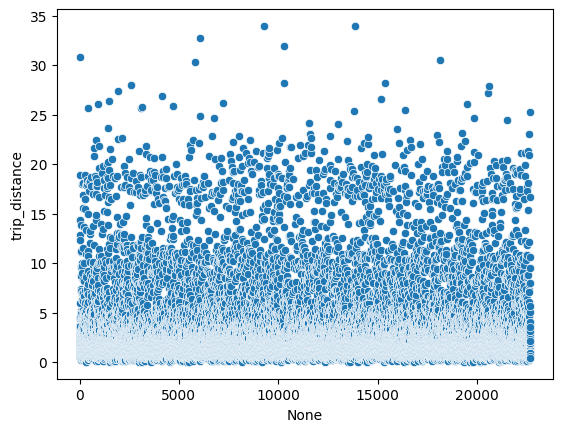

In [37]:
sns.scatterplot(x = data.index, y = data['trip_distance'])

<Axes: xlabel='None', ylabel='tip_amount'>

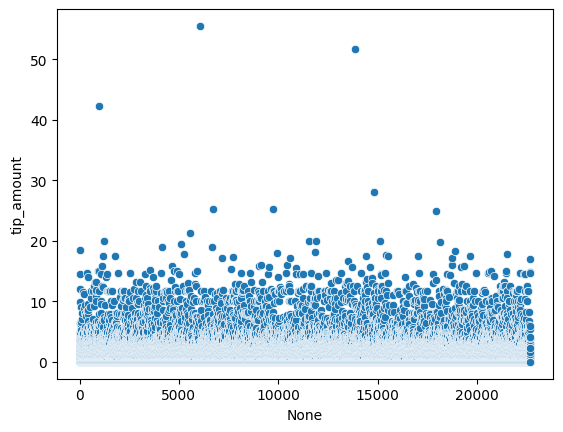

In [38]:
sns.scatterplot(x = data.index, y = data['tip_amount'])

<Axes: xlabel='None', ylabel='tolls_amount'>

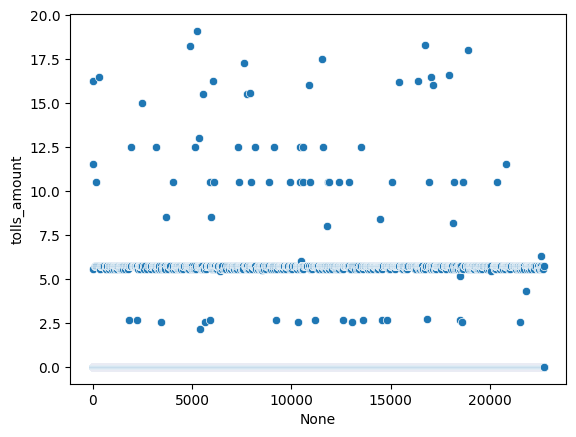

In [39]:
sns.scatterplot(x = data.index, y = data['tolls_amount'])

In [40]:
data[data['tip_amount'] > 40 ] # tip은 outlier로 보이지는 않음. trip_distance값도 높아 보여 그대로 유지.

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
986,Elaine Horton,08/23/2017 6:23:26 PM,08/23/2017 7:18:29 PM,Cash,1,16.70,52.00,42.29,0.00
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


# 3. 새로운 컬럼 만들기

In [41]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds()/60

In [42]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,duration
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0,16.716667


<Axes: xlabel='duration', ylabel='fare_amount'>

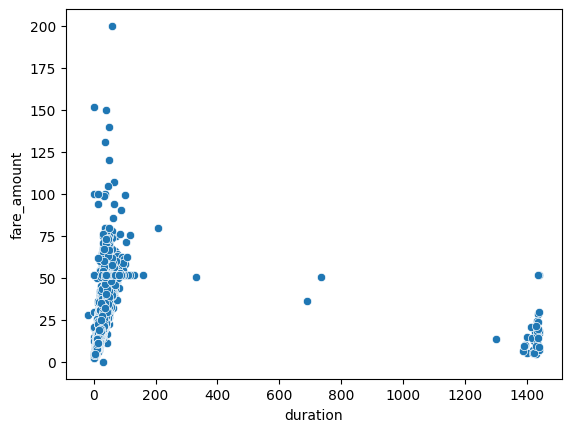

In [43]:
sns.scatterplot(x = data['duration'], y = data['fare_amount'])

# 4. Card 컬럼 통합하기

In [44]:
# Credit Card와 Debit Card를 구분없이 "Card"라는 이름만들기
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [45]:
data['payment_method'].apply(lambda x: 'Card' if x in ['Credit Card', 'Debit Card'] else x)

0        Card
1        Card
2        Card
3        Cash
4        Card
         ... 
22696    Cash
22697    Cash
22698    Card
22699    Card
22700    Cash
Name: payment_method, Length: 22501, dtype: object

In [46]:
data['payment_method'] = data['payment_method'].apply(lambda x: 'Card' if x in ['Credit Card', 'Debit Card'] else x)

In [47]:
data['payment_method'].unique()

array(['Card', 'Cash'], dtype=object)